In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"C:\Users\AVITA\Downloads\MovieRecommendations.csv")
df

In [ ]:
print(df.columns)


In [ ]:
print(df.describe())


In [ ]:
print(df.dtypes)


In [38]:
print(df.duplicated().sum())


0


In [ ]:
df.head()

In [ ]:
print(df[['title', 'rating']])

In [23]:
print(df[['title', 'FirstMovieRecommendation']])

                                      title  FirstMovieRecommendation
0                 'Til There Was You (1997)        Primal Fear (1996)
1                              1-900 (1994)    Full Monty, The (1997)
2                     101 Dalmatians (1996)     Murder at 1600 (1997)
3                       12 Angry Men (1957)        Ulee's Gold (1997)
4                                187 (1997)           Maverick (1994)
...                                     ...                       ...
1659                   Young Guns II (1990)  Cold Comfort Farm (1995)
1660  Young Poisoner's Handbook, The (1995)     Kiss the Girls (1997)
1661                Zeus and Roxanne (1997)         Piano, The (1993)
1662                                unknown        Primal Fear (1996)
1663     Á köldum klaka (Cold Fever) (1994)                         -

[1664 rows x 2 columns]


In [24]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Select the top 5 movies by number of ratings
top_5_movies_by_num_ratings = df.sort_values('numOfRatings', ascending=False).head(5)

# Display the 'Title', 'Rating', 'numOfRatings', and 'SecondMovieRecommendation' columns for the top 5 movies
print(top_5_movies_by_num_ratings[['title', 'rating', 'numOfRatings', 'SecondMovieRecommendation']])

                          title    rating  numOfRatings  \
1398           Star Wars (1977)  4.359589           584   
333              Contact (1997)  3.803536           509   
498                Fargo (1996)  4.155512           508   
1234  Return of the Jedi (1983)  4.007890           507   
860            Liar Liar (1997)  3.156701           485   

      SecondMovieRecommendation  
1398  Return of the Jedi (1983)  
333            Mask, The (1994)  
498            Lone Star (1996)  
1234           Star Wars (1977)  
860            Mask, The (1994)  


In [25]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Select the top 5 movies by rating
top_5_movies = df.sort_values('rating', ascending=False).head(5)

# Display the 'Title' and 'Rating' for the top 5 movies
print("Top 5 Movies by Rating:")
print(top_5_movies[['title', 'rating']])

Top 5 Movies by Rating:
                                           title  rating
1472              They Made Me a Criminal (1939)     5.0
944   Marlene Dietrich: Shadow and Light (1996)      5.0
1273        Saint of Fort Washington, The (1993)     5.0
1359               Someone Else's America (1995)     5.0
1387                             Star Kid (1997)     5.0


In [26]:
print(df.isnull().sum())  # Count missing values in each column


title                        0
rating                       0
numOfRatings                 0
FirstMovieRecommendation     0
SecondMovieRecommendation    0
ThirdMovieRecommendation     0
FourthMovieRecommendation    0
dtype: int64


In [27]:
# Ensure 'numOfRatings' is numeric
df['numOfRatings'] = pd.to_numeric(df['numOfRatings'], errors='coerce')

# Handle missing values in 'numOfRatings' using NumPy
df['numOfRatings'] = np.where(np.isnan(df['numOfRatings']), 0, df['numOfRatings'])

# Calculate some basic statistics using NumPy
mean_ratings = np.mean(df['numOfRatings'])
std_ratings = np.std(df['numOfRatings'])

print(f"Mean Number of Ratings: {mean_ratings}")
print(f"Standard Deviation of Ratings: {std_ratings}")


Mean Number of Ratings: 60.09795673076923
Standard Deviation of Ratings: 80.93915031378424


C:\Users\AVITA\AppData\Local\Temp\ipykernel_19892\763465552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=top_5_movies, palette='coolwarm')


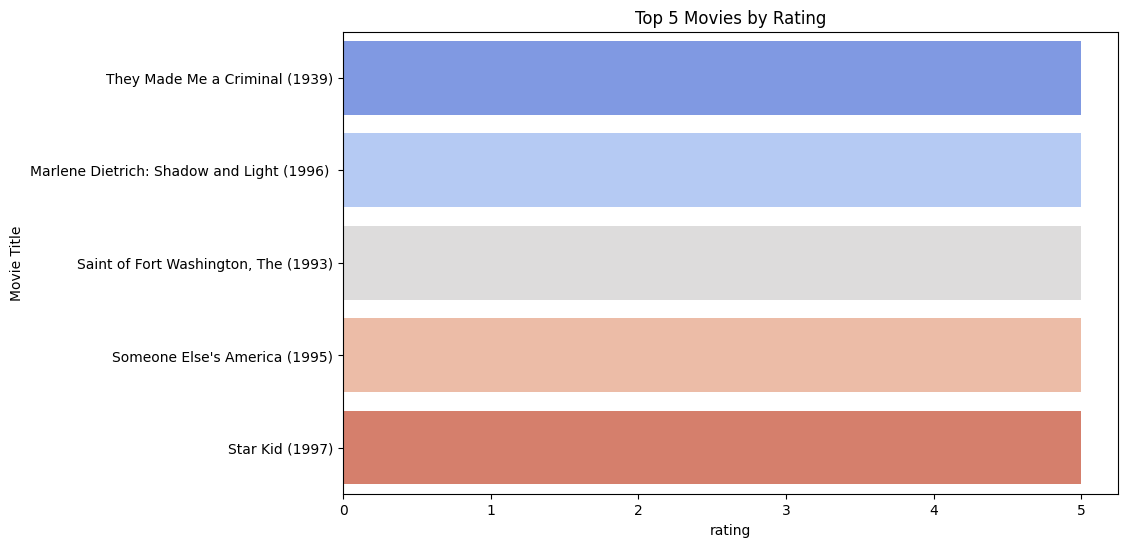

In [28]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Select the top 5 movies by rating
top_5_movies = df.sort_values('rating', ascending=False).head(5)

# Create a bar plot for the top 5 movies by rating
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='title', data=top_5_movies, palette='coolwarm')
plt.title('Top 5 Movies by Rating')
plt.xlabel('rating')
plt.ylabel('Movie Title')
plt.show()

C:\Users\AVITA\AppData\Local\Temp\ipykernel_19892\1082040139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='numOfRatings', y='title', data=top_movies, palette='viridis')


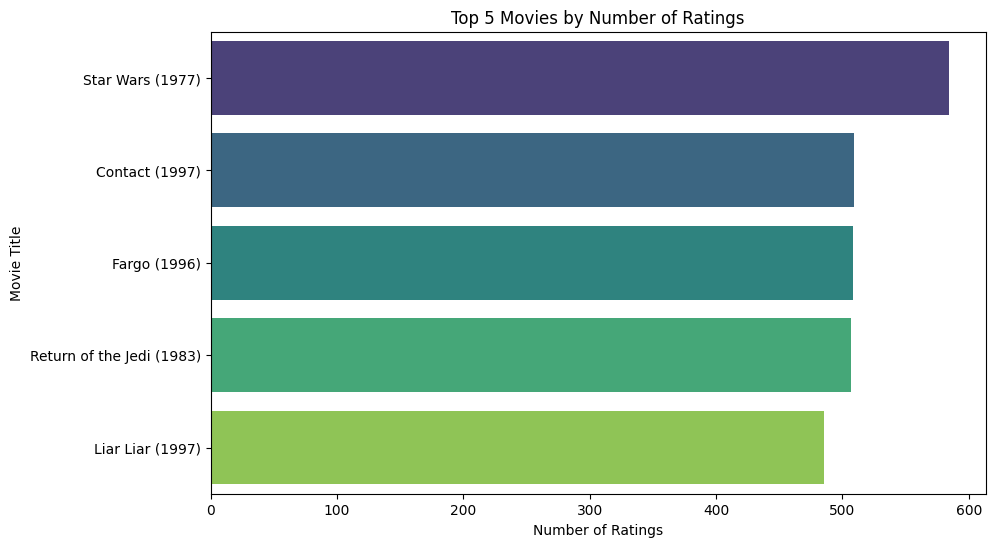

In [29]:
# Sort by number of ratings and get the top 5 movies
top_movies = df.sort_values('numOfRatings', ascending=False).head(5)

# Bar plot for the top 5 movies by number of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='numOfRatings', y='title', data=top_movies, palette='viridis')
plt.title('Top 5 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


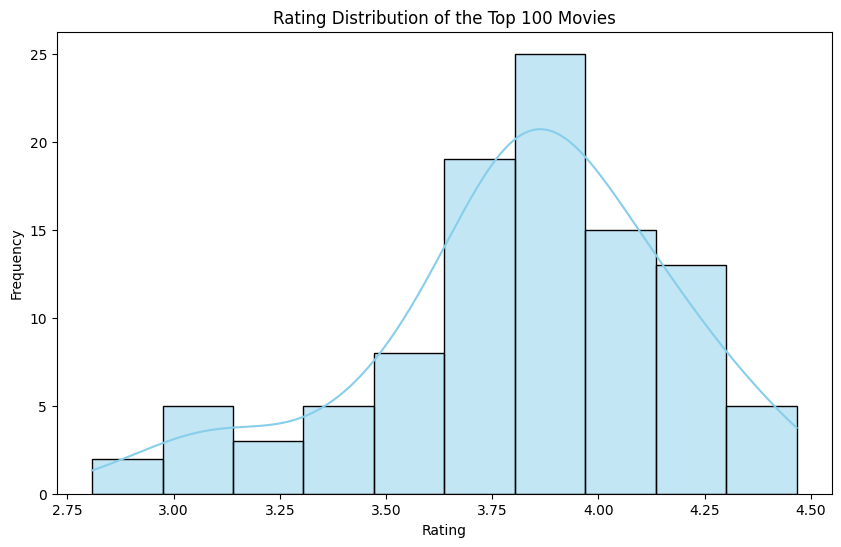

In [30]:
# Select the top 100 movies by number of ratings
top_100_movies = df.sort_values('numOfRatings', ascending=False).head(100)

# Histogram for Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(top_100_movies['rating'], bins=10, kde=True, color='skyblue')
plt.title('Rating Distribution of the Top 100 Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Correlation between Number of Ratings and Rating: 0.4309891075146421


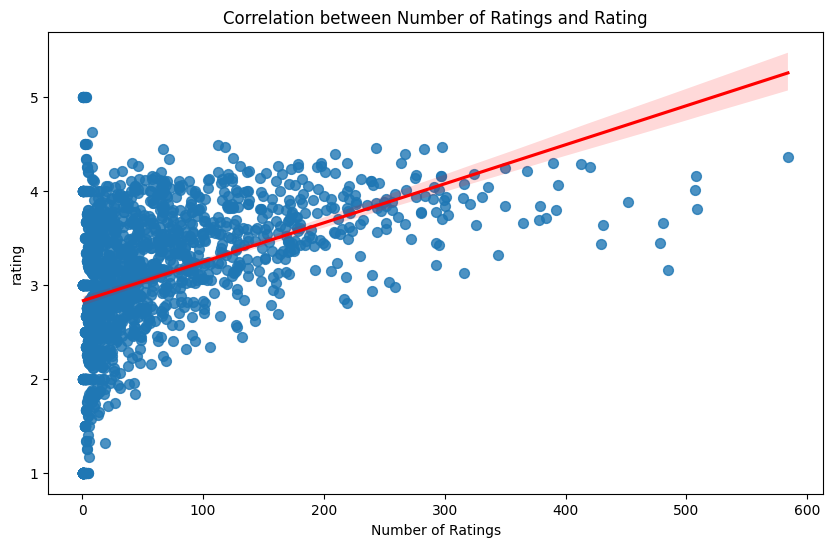

In [31]:
# Calculate the correlation between the number of ratings and the average rating
correlation = np.corrcoef(df['numOfRatings'], df['rating'])[0, 1]
print(f"Correlation between Number of Ratings and Rating: {correlation}")

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='numOfRatings', y='rating', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Number of Ratings and Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('rating')
plt.show()


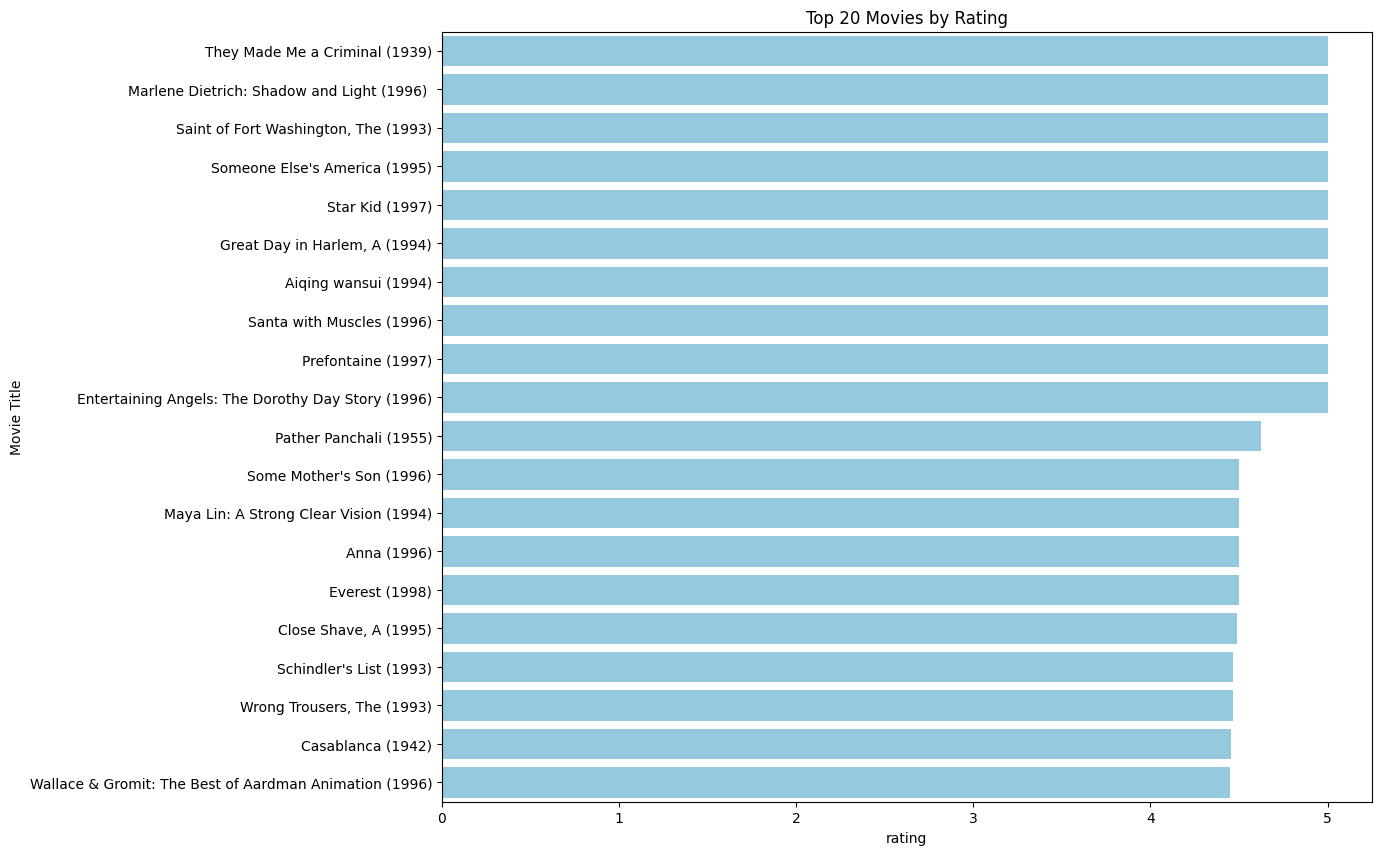

In [32]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Sort by rating and get the top 20 movies
top_20_movies_by_rating = df.sort_values('rating', ascending=False).head(20)

# Bar plot for top 20 movies by rating
plt.figure(figsize=(12, 10))
sns.barplot(x='rating', y='title', data=top_20_movies_by_rating, color='skyblue')
plt.title('Top 20 Movies by Rating')
plt.xlabel('rating')
plt.ylabel('Movie Title')
plt.show()

In [33]:
# Drop the recommendation columns
columns_to_drop = ['FirstMovieRecommendation', 'SecondMovieRecommendation', 'ThirdMovieRecommendation', 'FourthMovieRecommendation']
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(df_cleaned)


                                      title    rating  numOfRatings
0                 'Til There Was You (1997)  2.333333             9
1                              1-900 (1994)  2.600000             5
2                     101 Dalmatians (1996)  2.908257           109
3                       12 Angry Men (1957)  4.344000           125
4                                187 (1997)  3.024390            41
...                                     ...       ...           ...
1659                   Young Guns II (1990)  2.772727            44
1660  Young Poisoner's Handbook, The (1995)  3.341463            41
1661                Zeus and Roxanne (1997)  2.166667             6
1662                                unknown  3.444444             9
1663     Á köldum klaka (Cold Fever) (1994)  3.000000             1

[1664 rows x 3 columns]


In [34]:
df.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,Primal Fear (1996),Indiana Jones and the Last Crusade (1989),"Edge, The (1997)",Beautiful Girls (1996)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [35]:
df

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,Primal Fear (1996),Indiana Jones and the Last Crusade (1989),"Edge, The (1997)",Beautiful Girls (1996)
1,1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
2,101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
3,12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
4,187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)
...,...,...,...,...,...,...,...
1659,Young Guns II (1990),2.772727,44,Cold Comfort Farm (1995),Sense and Sensibility (1995),"Maltese Falcon, The (1941)",Young Guns (1988)
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41,Kiss the Girls (1997),"Peacemaker, The (1997)","Sound of Music, The (1965)","Nightmare Before Christmas, The (1993)"
1661,Zeus and Roxanne (1997),2.166667,6,"Piano, The (1993)","Wizard of Oz, The (1939)","Rainmaker, The (1997)",Forrest Gump (1994)
1662,unknown,3.444444,9,Primal Fear (1996),Casablanca (1942),Harold and Maude (1971),"Ice Storm, The (1997)"
